<a href="https://colab.research.google.com/github/imran201khan/MachineLearning-from-Basic-/blob/main/simple_imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('/content/Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [20]:
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [21]:
cols=[var for var in df.columns if((df[var].isnull()).mean()<0.10 and df[var].isnull().mean()>0)]

In [22]:
cols

['CREDIT_SCORE', 'ANNUAL_MILEAGE']

In [23]:
len(df[cols].dropna())/len(df)

0.8149

In [24]:
new_df=df[cols].dropna()

In [27]:
new_df.head()

,CREDIT_SCORE,ANNUAL_MILEAGE
0,0.629027,12000.0
1,0.357757,16000.0
2,0.493146,11000.0
3,0.206013,11000.0
4,0.388366,12000.0


In [26]:
df.shape,new_df.shape

((10000, 19), (8149, 2))

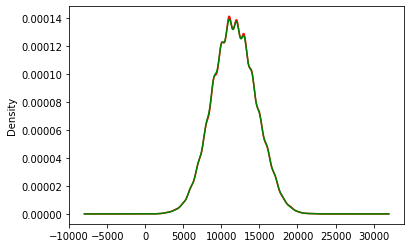

In [29]:
fig=plt.figure()
ax=fig.add_subplot()
#original data
df['ANNUAL_MILEAGE'].plot.density(color='red')
#after
new_df['ANNUAL_MILEAGE'].plot.density(color='green')

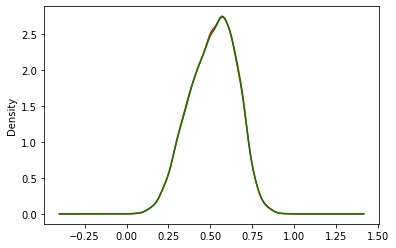

In [30]:
fig=plt.figure()
ax=fig.add_subplot()
#original data
df['CREDIT_SCORE'].plot.density(color='red')
#after
new_df['CREDIT_SCORE'].plot.density(color='green')

In [31]:
from sklearn.impute import SimpleImputer

In [41]:
new_df=df[['CREDIT_SCORE','ANNUAL_MILEAGE','CHILDREN']]

In [42]:
new_df

,CREDIT_SCORE,ANNUAL_MILEAGE,CHILDREN
0,0.629027,12000.0,1.0
1,0.357757,16000.0,0.0
2,0.493146,11000.0,0.0
3,0.206013,11000.0,1.0
4,0.388366,12000.0,0.0
...,...,...,...
9995,0.582787,16000.0,0.0
9996,0.522231,NaN,1.0
9997,0.470940,14000.0,1.0
9998,0.364185,13000.0,1.0


In [40]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(new_df.drop('CHILDREN',axis=1),new_df['CHILDREN'],test_size=0.23)

KeyError: ignored

In [47]:
x_train

,CREDIT_SCORE,ANNUAL_MILEAGE
3021,0.437882,11000.0
6331,0.371223,13000.0
170,0.498357,12000.0
4561,0.506608,NaN
3003,0.309790,10000.0
...,...,...
2070,0.533617,10000.0
5557,0.570023,10000.0
2367,0.339877,10000.0
7746,0.378615,15000.0


In [53]:
x_train_credi_mean=x_train['CREDIT_SCORE'].mean()
x_train_credi_median=x_train['CREDIT_SCORE'].median()
x_train_credi_median,x_train_credi_mean

(0.5267473391434415, 0.5164380390774849)

In [52]:
x_train_annual_mean=x_train['ANNUAL_MILEAGE'].mean()
x_train_annual_median=x_train['ANNUAL_MILEAGE'].median()
x_train_annual_mean,x_train_annual_median

(11686.474820143885, 12000.0)

In [55]:
x_train['CREDIT_SCORE']=x_train['CREDIT_SCORE'].fillna(x_train_credi_mean)
x_train['CREDIT_SCORE']=x_train['CREDIT_SCORE'].fillna(x_train_credi_median)

In [58]:
x_train['ANNUAL_MILEAGE']=x_train['ANNUAL_MILEAGE'].fillna(x_train_annual_mean)
x_train['ANNUAL_MILEAGE']=x_train['ANNUAL_MILEAGE'].fillna(x_train_annual_median)

In [60]:
x_train.sample(5)

,CREDIT_SCORE,ANNUAL_MILEAGE
6438,0.586918,6000.0
4582,0.547423,9000.0
9575,0.532228,14000.0
1076,0.390011,19000.0
5506,0.591840,12000.0


In [61]:
x_train.isnull().sum()

CREDIT_SCORE      0
ANNUAL_MILEAGE    0
dtype: int64

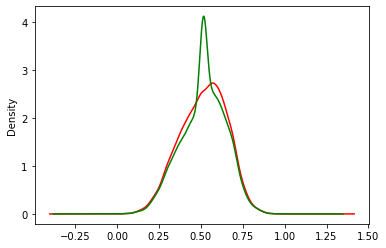

In [62]:
fig=plt.figure()
ax=fig.add_subplot()
#original data
df['CREDIT_SCORE'].plot.density(color='red')
#after
x_train['CREDIT_SCORE'].plot.density(color='green')

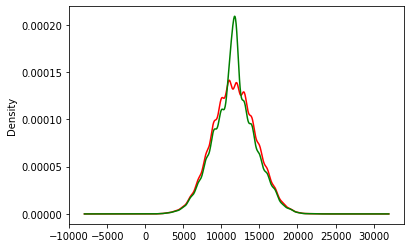

In [63]:
fig=plt.figure()
ax=fig.add_subplot()
#original data
df['ANNUAL_MILEAGE'].plot.density(color='red')
#after
x_train['ANNUAL_MILEAGE'].plot.density(color='green')

In [65]:
x_train,x_test,y_train,y_test=train_test_split(new_df,df['CHILDREN'],test_size=0.23)

In [68]:
x_train.sample(5)

,CREDIT_SCORE,ANNUAL_MILEAGE
6340,0.679420,18000.0
6367,0.448070,14000.0
4754,0.313232,15000.0
9793,0.531840,10000.0
3177,NaN,10000.0


In [71]:
from sklearn.compose import ColumnTransformer

In [72]:
from sklearn.impute import SimpleImputer

In [75]:
imp1=SimpleImputer(strategy='mean')
imp2=SimpleImputer(strategy='median')

In [78]:
ct=ColumnTransformer([('imp1',imp1,['CREDIT_SCORE']),
                      ('imp2',imp2,['ANNUAL_MILEAGE'])
                      ],remainder='passthrough')

In [79]:
ct.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1', SimpleImputer(), ['CREDIT_SCORE']),
                                ('imp2', SimpleImputer(strategy='median'),
                                 ['ANNUAL_MILEAGE'])])

In [81]:
ct.named_transformers_['imp1'].statistics_

array([0.5157886])

In [82]:
ct.named_transformers_['imp2'].statistics_

array([12000.])